# **$\bullet$ Nicolás Esteban Jarpa Jeldres**
# **$\bullet$ Cesar Andres Franco Mindiola**
---

* Cada respuesta debe ser explicada claramente sin dejar espacio a dobles interpretaciones
* El código de la tarea debe estar comentado.
* Está bien discutir las respuestas con compañeros/as. Está bien buscar la respuesta en internet. No está bien entregar código escrito por otras personas ya sea compañeros, código obtenido por internet u otros.
* Todo código entregado debe ser escrito completamente por usted. De lo contrario, su tarea será penalizada con la nota mínima.

# **Problema 1** (4 puntos)
## ***Clasificación*** Implemente 2 modelos y compare

El conjunto de datos contiene registros anonimizados sobre el comportamiento de estudiantes en redes sociales y los resultados relacionados en su vida. Abarca múltiples países y niveles académicos, centrándose en dimensiones clave como la intensidad de uso, las plataformas preferidas y la dinámica de relaciones. Cada fila representa la respuesta de un estudiante a la encuesta.

**Población:** Estudiantes de entre 16 y 25 años matriculados en enseñanza media, programas de pregrado o postgrado.

**Geografía:** Internacional.

**Período:** Datos recopilados mediante una encuesta en línea realizada una sola vez durante el primer trimestre de 2025.

**Diseño de la encuesta:** Preguntas adaptadas de escalas validadas sobre adicción a redes sociales (por ejemplo, Bergen Social Media Addiction Scale) e índices de conflicto en relaciones.

**Reclutamiento:** Participantes reclutados a través de listas de correo universitarias y plataformas de redes sociales, asegurando diversidad en nivel académico y país.

*   Sexo = 0: femenino; 1: masculino
*   Nivel académico = 0: enseñanza media; 1:pregrado; 2:postgrado
*   Score_salud_mental = 1: pobre a 10: excelente
*   Score_adiccion = 1: bajo a 10: alto.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**$\cdot$ Exploración de datos:**

In [6]:
# 📥 Cargar y preparar el dataset de Adicción a Redes Sociales

import pandas as pd

# Cargar el dataset (asegúrate de tener el archivo en el mismo directorio)
df = pd.read_csv("P1_Adiccion-RRSS.csv", encoding="latin1", sep=";")

# Corregir posibles errores de codificación en nombres de columnas
df.columns = [col.replace("", "ñ") for col in df.columns]

# Crear una columna "Adicto" binaria basada en el score de adicción
df["Adicto"] = (df["Score_adiccion"] >= 7).astype(int)

# Mostramos las primeras filas del DataFrame para verificar
df.head()


,ID,Edad,Sexo,Nivel_academico,Pais,Prom_diario_uso_hrs,Plataforma_fav,Afecta_performance_academico,Hrs_sueño_por_noche,Score_salud_mental,Relaciones,Conflictos_Social_Media,Score_adiccion,Adicto
0,1,19,0,1,Bangladesh,5.2,Instagram,Si,6.5,6,En relacion,3,8,1
1,2,22,1,2,India,2.1,Twitter,No,7.5,8,Soltero-a,0,3,0
2,3,20,0,1,USA,6.0,TikTok,Si,5.0,5,Complicado,4,9,1
3,4,18,1,0,UK,3.0,YouTube,No,7.0,7,Soltero-a,1,4,0
4,5,21,1,2,Canada,4.5,Facebook,Si,6.0,6,En relacion,2,7,1


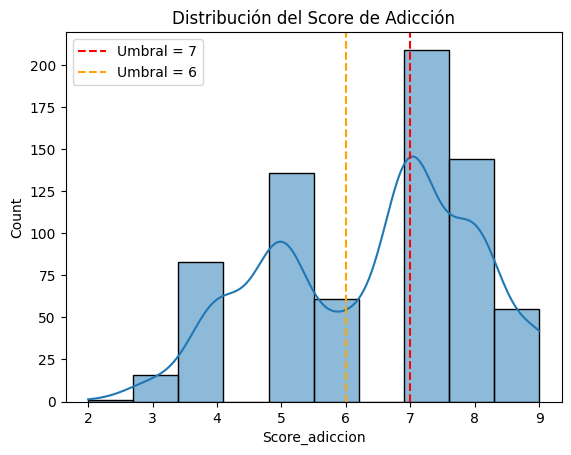

In [7]:

sns.histplot(df["Score_adiccion"], bins=10, kde=True)
plt.axvline(7, color='red', linestyle='--', label="Umbral = 7")
plt.axvline(6, color='orange', linestyle='--', label="Umbral = 6")
plt.title("Distribución del Score de Adicción")
plt.legend()
plt.show()

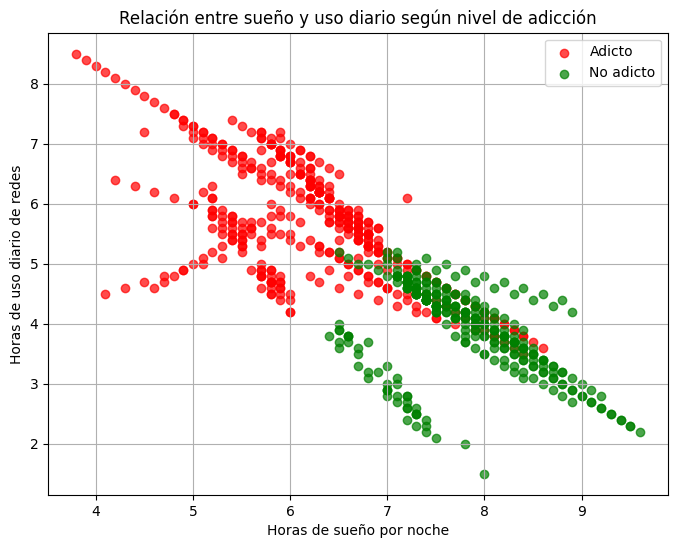

In [9]:
# 📊 Visualización de sueño vs. uso diario por nivel de adicción

import matplotlib.pyplot as plt

# Diccionario de colores para la variable binaria 'Adicto'
colores = {0: "green", 1: "red"}
etiquetas = {0: "No adicto", 1: "Adicto"}

# Definir tamaño del gráfico
plt.figure(figsize=(8, 6))

# Iterar sobre cada grupo (adictos y no adictos)
for clase in df["Adicto"].unique():
    subset = df[df["Adicto"] == clase]

    # Graficar los puntos
    plt.scatter(
        subset["Hrs_sueño_por_noche"],        # Eje x: horas de sueño
        subset["Prom_diario_uso_hrs"],        # Eje y: horas de uso diario
        label=etiquetas[clase],               # Etiqueta de leyenda
        color=colores[clase],                 # Color según clase
        alpha=0.7                              # Transparencia
    )

# Añadir título y etiquetas
plt.title("Relación entre sueño y uso diario según nivel de adicción")
plt.xlabel("Horas de sueño por noche")
plt.ylabel("Horas de uso diario de redes")

# Mostrar leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico final
plt.show()


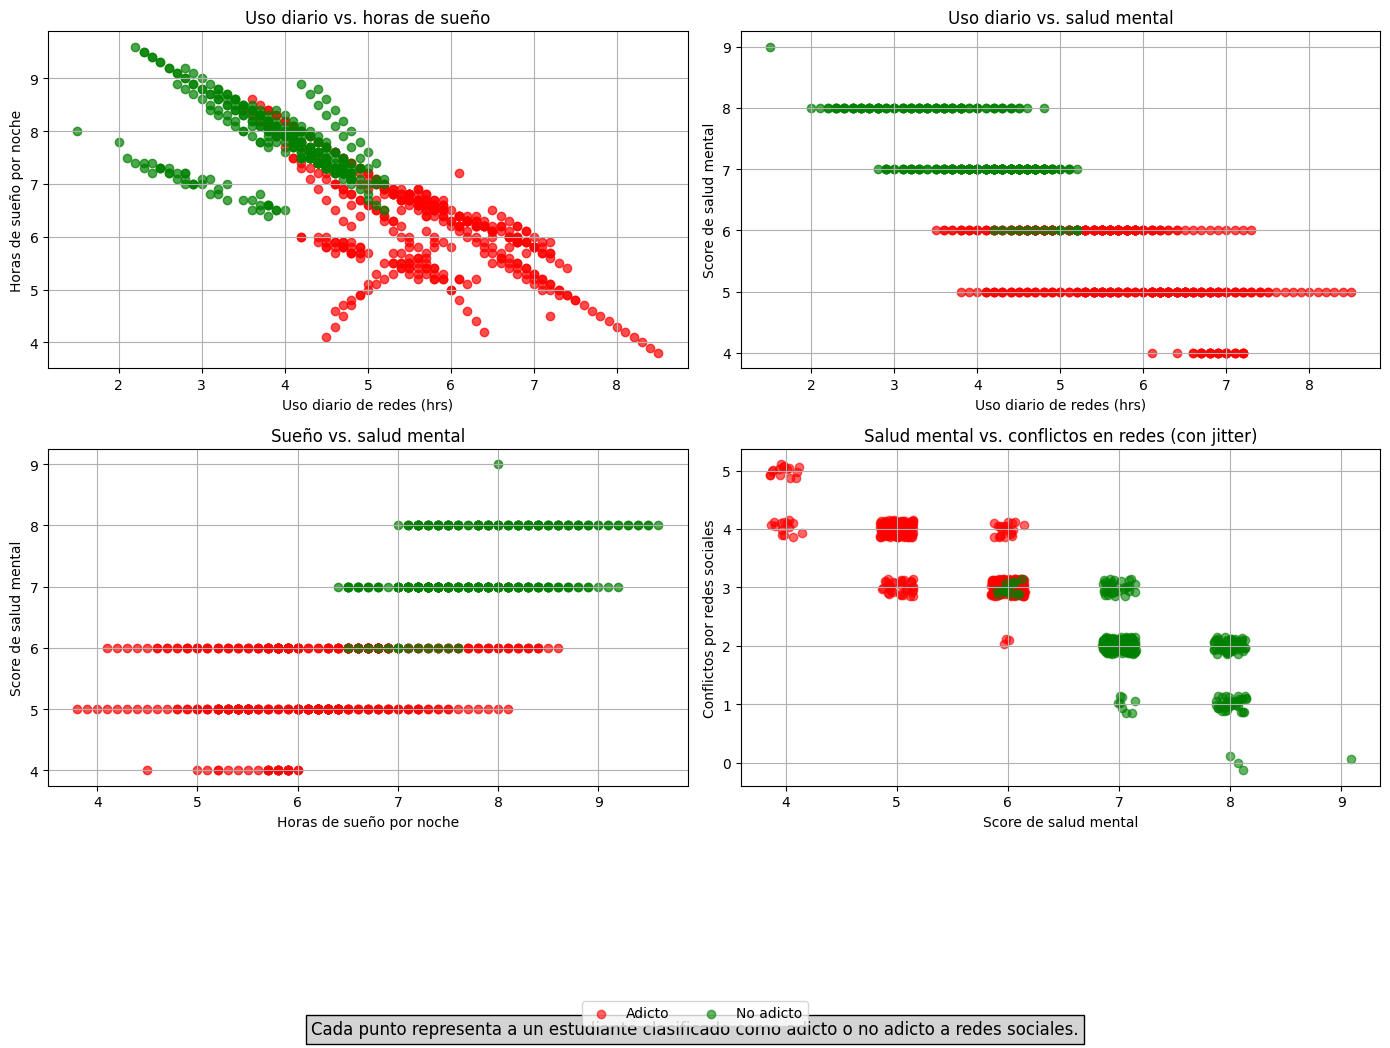

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Diccionario de colores para la clase Adicto
colores = {0: "green", 1: "red"}
etiquetas = {0: "No adicto", 1: "Adicto"}

# Diccionario con nombres traducidos de columnas
columnas_traducidas = {
    "Prom_diario_uso_hrs": "Uso diario de redes (hrs)",
    "Hrs_sueño_por_noche": "Horas de sueño por noche",
    "Score_salud_mental": "Score de salud mental",
    "Conflictos_Social_Media": "Conflictos por redes sociales"
}

# Crear figura 2x2 (4 gráficos)
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Combinaciones de columnas a graficar (x, y)
plots = [
    ("Prom_diario_uso_hrs", "Hrs_sueño_por_noche"),
    ("Prom_diario_uso_hrs", "Score_salud_mental"),
    ("Hrs_sueño_por_noche", "Score_salud_mental"),
    ("Score_salud_mental", "Conflictos_Social_Media")  # Este llevará jitter
]

# Títulos para cada gráfico
titles = [
    "Uso diario vs. horas de sueño",
    "Uso diario vs. salud mental",
    "Sueño vs. salud mental",
    "Salud mental vs. conflictos en redes (con jitter)"
]

# Crear cada gráfico
for i, ax in enumerate(axs.flat):
    x_col, y_col = plots[i]

    if (x_col, y_col) == ("Score_salud_mental", "Conflictos_Social_Media"):
        # Aplicamos jitter solo al cuarto gráfico
        for clase in df["Adicto"].unique():
            subset = df[df["Adicto"] == clase]
            x = subset[x_col] + np.random.uniform(-0.15, 0.15, size=len(subset))
            y = subset[y_col] + np.random.uniform(-0.15, 0.15, size=len(subset))
            ax.scatter(x, y, label=etiquetas[clase], color=colores[clase], alpha=0.6)
    else:
        for clase in df["Adicto"].unique():
            subset = df[df["Adicto"] == clase]
            ax.scatter(
                subset[x_col],
                subset[y_col],
                label=etiquetas[clase],
                color=colores[clase],
                alpha=0.7
            )

    ax.set_xlabel(columnas_traducidas[x_col])
    ax.set_ylabel(columnas_traducidas[y_col])
    ax.set_title(titles[i])
    ax.grid(True)

# Leyenda general
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, bbox_to_anchor=(0.5, -0.05))

# Texto explicativo
fig.text(0.5, -0.09, 'Cada punto representa a un estudiante clasificado como adicto o no adicto a redes sociales.',
         ha='center', fontsize=12,
         bbox=dict(facecolor='lightgrey', edgecolor='black'))

# Ajustar diseño
plt.tight_layout(rect=[0, 0.1, 1, 0.95])

# Mostrar gráfico
plt.show()


**$\cdot$ Modelo de clasificación 1:**

In [11]:
# 📥 Cargar y preparar el dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset
df = pd.read_csv("P1_Adiccion-RRSS.csv", encoding="latin1", sep=";")
df.columns = [col.replace("", "ñ") for col in df.columns]

# Crear variable objetivo binaria
df["Adicto"] = (df["Score_adiccion"] >= 7).astype(float)

# Codificar variables categóricas
le = LabelEncoder()
for col in ['Pais', 'Plataforma_fav', 'Afecta_performance_academico', 'Relaciones']:
    df[col] = le.fit_transform(df[col])

# Selección de variables predictoras
X = df[['Edad', 'Nivel_academico', 'Prom_diario_uso_hrs',
        'Hrs_sueño_por_noche', 'Score_salud_mental', 'Conflictos_Social_Media',
         'Plataforma_fav', 'Afecta_performance_academico', 'Relaciones']]
y = df["Adicto"]

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, stratify=y, random_state=42)

# 🌲 Modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predicción
y_pred_rf = rf.predict(X_test)

# Evaluación
print("🌲 Random Forest - Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_rf, target_names=["No adicto", "Adicto"]))



🌲 Random Forest - Reporte de clasificación:

              precision    recall  f1-score   support

   No adicto       1.00      0.99      0.99        89
      Adicto       0.99      1.00      1.00       123

    accuracy                           1.00       212
   macro avg       1.00      0.99      1.00       212
weighted avg       1.00      1.00      1.00       212



**$\cdot$ Modelo de clasificación 2:**

In [12]:
# 📥 Cargar y preparar el dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Cargar el dataset
df = pd.read_csv("P1_Adiccion-RRSS.csv", encoding="latin1", sep=";")
df.columns = [col.replace("", "ñ") for col in df.columns]

# Crear variable objetivo: Adicto si Score_adiccion >= 7
df["Adicto"] = (df["Score_adiccion"] >= 7).astype(int)

# Codificar variables categóricas
le = LabelEncoder()
for col in ['Pais', 'Plataforma_fav', 'Afecta_performance_academico', 'Relaciones']:
    df[col] = le.fit_transform(df[col])

# Variables predictoras
X = df[['Edad', 'Sexo', 'Nivel_academico', 'Prom_diario_uso_hrs',
        'Hrs_sueño_por_noche', 'Score_salud_mental', 'Conflictos_Social_Media',
        'Pais', 'Plataforma_fav', 'Afecta_performance_academico', 'Relaciones']]

# Variable objetivo
y = df["Adicto"]

# Escalamiento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba (70% / 30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# 🤖 Modelo KNN con 2 vecinos
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Predicción y evaluación
y_pred_knn = knn.predict(X_test)

print("📘 KNN (2 vecinos) - Reporte de clasificación:\n")
print(classification_report(y_test, y_pred_knn, target_names=["No adicto", "Adicto"]))



📘 KNN (2 vecinos) - Reporte de clasificación:

              precision    recall  f1-score   support

   No adicto       0.99      0.99      0.99        89
      Adicto       0.99      0.99      0.99       123

    accuracy                           0.99       212
   macro avg       0.99      0.99      0.99       212
weighted avg       0.99      0.99      0.99       212



**$\cdot$ Análisis de métricas de comparación:**

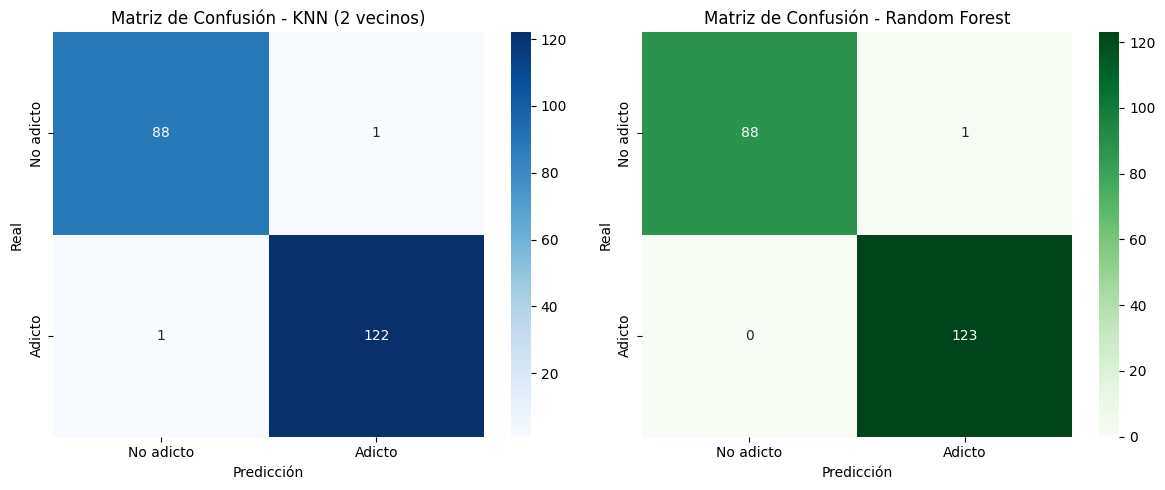

In [13]:
# 📊 Visualización comparativa de matrices de confusión para KNN y Random Forest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Matrices de confusión
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Etiquetas de las clases
etiquetas = ["No adicto", "Adicto"]

# Crear figura con 2 subplots (uno para cada modelo)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz de confusión KNN
sns.heatmap(
    cm_knn,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=etiquetas,
    yticklabels=etiquetas,
    ax=axes[0]
)
axes[0].set_title("Matriz de Confusión - KNN (2 vecinos)")
axes[0].set_xlabel("Predicción")
axes[0].set_ylabel("Real")

# Matriz de confusión Random Forest
sns.heatmap(
    cm_rf,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=etiquetas,
    yticklabels=etiquetas,
    ax=axes[1]
)
axes[1].set_title("Matriz de Confusión - Random Forest")
axes[1].set_xlabel("Predicción")
axes[1].set_ylabel("Real")

# Ajustar espaciado
plt.tight_layout()
plt.show()


**Además:**

*   Realice una optimización de los modelos en caso de ser necesario. ¿Qué configuración logra el mejor desempeño?
*   Analice el balance de clases en el conjunto de entrenamiento. Si hay desbalance, aplique técnicas para mejorar en caso de ser necesario. ¿Cuál técnica mejora el desempeño general del modelo? Justifica con métricas y gráficos.
*   Explicar las predicciones individuales del modelo. Elija tres estudiantes del conjunto de test y explique por qué fueron clasificados como "adictos" o "no adictos" (por ejemplo).
*   Realice visualizaciones que estén relacionadas con sus comentarios y permita explorar la relación entre horas de sueño, uso diario y nivel de adicción predicho por el modelo.





In [14]:
df["Adicto"].value_counts()




Adicto
1    408
0    297
Name: count, dtype: int64

In [44]:
import pandas as pd

# Crear el DataFrame de comparación
comparacion_modelos = pd.DataFrame({
    "Real": y_test.values,
    "RandomForest": y_pred_rf,
    "KNN": y_pred_knn
}, index=y_test.index)

# Unir con los datos originales (sin estandarizar) para mejor interpretación
X_test_original = pd.DataFrame(scaler.inverse_transform(X_test), columns=X.columns, index=y_test.index)
comparacion_modelos = comparacion_modelos.join(X_test_original)

# Seleccionar 3 estudiantes aleatorios
ejemplares = comparacion_modelos.sample(3, random_state=42)

# Mapear etiquetas binarias a texto
mapeo = {0.0: "No adicto", 1.0: "Adicto"}
ejemplares["Real_txt"] = ejemplares["Real"].map(mapeo)
ejemplares["Pred_RF"] = ejemplares["RandomForest"].map(mapeo)
ejemplares["Pred_KNN"] = ejemplares["KNN"].map(mapeo)

# Mostrar resumen
print(ejemplares[[
    "Edad", "Prom_diario_uso_hrs", "Hrs_sueño_por_noche", "Score_salud_mental",
    "Conflictos_Social_Media", "Real_txt", "Pred_RF", "Pred_KNN"
]])

     Edad  Prom_diario_uso_hrs  Hrs_sueño_por_noche  Score_salud_mental  \
130  19.0                  4.3                  7.7                 7.0   
62   20.0                  4.2                  6.0                 6.0   
191  22.0                  4.8                  8.0                 7.0   

     Conflictos_Social_Media   Real_txt    Pred_RF   Pred_KNN  
130                      2.0  No adicto  No adicto  No adicto  
62                       3.0     Adicto     Adicto     Adicto  
191                      2.0  No adicto  No adicto  No adicto  


In [46]:
import pandas as pd

# Crear el DataFrame de comparación
comparacion_modelos = pd.DataFrame({
    "Real": y_test.values,
    "RandomForest": y_pred_rf,
    "KNN": y_pred_knn
}, index=y_test.index)

# Agregar las variables predictoras originales
comparacion_modelos = comparacion_modelos.join(pd.DataFrame(X_test, columns=X.columns))

# Seleccionar 3 estudiantes aleatorios
ejemplares = comparacion_modelos.sample(3, random_state=42)

# Crear nuevas columnas para las versiones textuales de las predicciones y valores reales
mapeo = {0.0: "No adicto", 1.0: "Adicto"}
ejemplares["Real_txt"] = ejemplares["Real"].map(mapeo)
ejemplares["Pred_RF"] = ejemplares["RandomForest"].map(mapeo)
ejemplares["Pred_KNN"] = ejemplares["KNN"].map(mapeo)

# Mostrar el resumen
print(ejemplares[[
    "Edad", "Prom_diario_uso_hrs", "Hrs_sueño_por_noche", "Score_salud_mental",
    "Conflictos_Social_Media", "Real_txt", "Pred_RF", "Pred_KNN"
]])

         Edad  Prom_diario_uso_hrs  Hrs_sueño_por_noche  Score_salud_mental  \
130  0.243470             0.303443            -0.061220           -0.205520   
62   0.243470             0.144271             0.116393           -1.111095   
191 -1.186915             0.303443            -0.682862           -1.111095   

     Conflictos_Social_Media   Real_txt    Pred_RF   Pred_KNN  
130                 0.157063  No adicto  No adicto  No adicto  
62                  0.157063     Adicto     Adicto     Adicto  
191                 0.157063  No adicto  No adicto  No adicto  


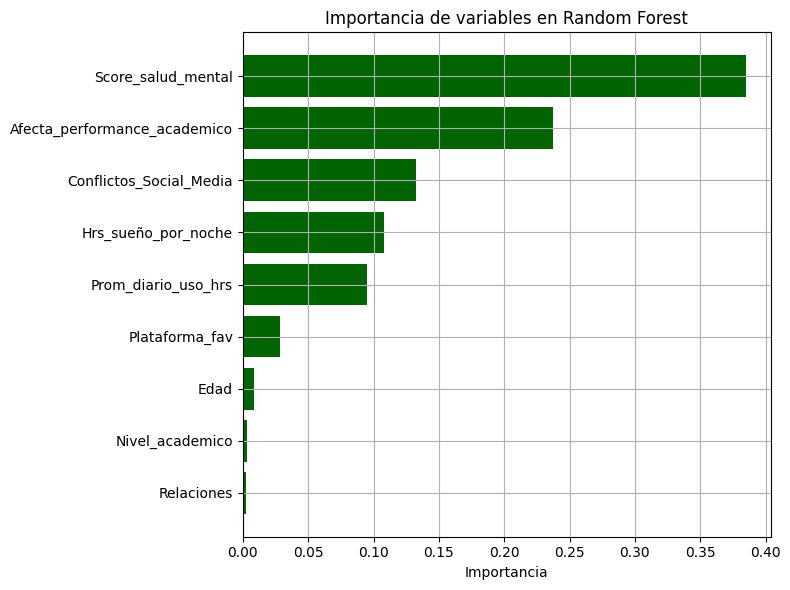

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Las columnas que usaste como variables predictoras
columnas_usadas = ['Edad', 'Nivel_academico', 'Prom_diario_uso_hrs',
                   'Hrs_sueño_por_noche', 'Score_salud_mental',
                   'Conflictos_Social_Media', 'Plataforma_fav',
                   'Afecta_performance_academico', 'Relaciones']

# Obtener las importancias del modelo entrenado
importancias = rf.feature_importances_

# Crear DataFrame con las importancias
df_importancia = pd.DataFrame({
    "Variable": columnas_usadas,
    "Importancia": importancias
}).sort_values(by="Importancia", ascending=True)

# Graficar
plt.figure(figsize=(8, 6))
plt.barh(df_importancia["Variable"], df_importancia["Importancia"], color="darkgreen")
plt.xlabel("Importancia")
plt.title("Importancia de variables en Random Forest")
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
# Copiar y resetear índices para evitar conflictos
df_rf = comparacion_modelos.copy().reset_index(drop=True)
df_knn = comparacion_modelos.copy().reset_index(drop=True)

df_rf["Modelo"] = "Random Forest"
df_rf["Predicción"] = df_rf["RandomForest"].map({0.0: "No adicto", 1.0: "Adicto"})

df_knn["Modelo"] = "KNN"
df_knn["Predicción"] = df_knn["KNN"].map({0.0: "No adicto", 1.0: "Adicto"})

# Concatenar sin índices duplicados
df_total = pd.concat([df_rf, df_knn], ignore_index=True)


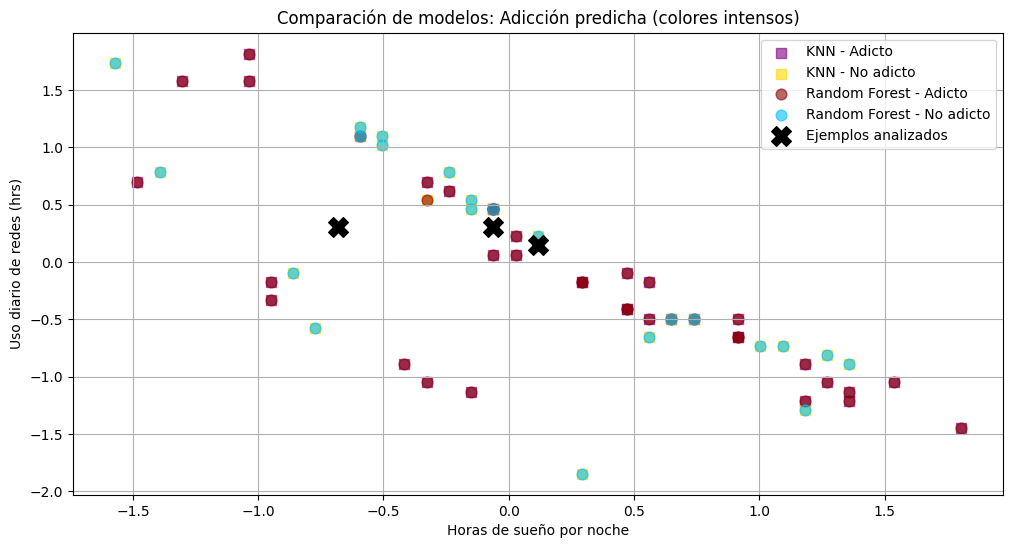

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapeo de colores más notorios para Adicto / No adicto por modelo
palette_rf = {"Adicto": "darkred", "No adicto": "deepskyblue"}
palette_knn = {"Adicto": "purple", "No adicto": "gold"}

# Definir paleta combinada
palette_total = {
    ("Random Forest", "Adicto"): palette_rf["Adicto"],
    ("Random Forest", "No adicto"): palette_rf["No adicto"],
    ("KNN", "Adicto"): palette_knn["Adicto"],
    ("KNN", "No adicto"): palette_knn["No adicto"],
}

# Función auxiliar para asignar color por fila
df_total["Color"] = df_total.apply(lambda row: palette_total[(row["Modelo"], row["Predicción"])], axis=1)

# Graficar manualmente para mayor control
plt.figure(figsize=(12, 6))

# Dibujar cada grupo por separado para controlar colores
for (modelo, prediccion), grupo in df_total.groupby(["Modelo", "Predicción"]):
    plt.scatter(
        grupo["Hrs_sueño_por_noche"],
        grupo["Prom_diario_uso_hrs"],
        label=f"{modelo} - {prediccion}",
        color=palette_total[(modelo, prediccion)],
        alpha=0.6,
        s=60,
        marker="o" if modelo == "Random Forest" else "s"  # círculos para RF, cuadrados para KNN
    )

# Añadir los puntos destacados (3 estudiantes)
plt.scatter(
    ejemplares["Hrs_sueño_por_noche"],
    ejemplares["Prom_diario_uso_hrs"],
    marker="X",
    s=200,
    color="black",
    label="Ejemplos analizados"
)

plt.title("Comparación de modelos: Adicción predicha (colores intensos)")
plt.xlabel("Horas de sueño por noche")
plt.ylabel("Uso diario de redes (hrs)")
plt.grid(True)
plt.legend()
plt.show()


# **Problema 2**
## ***Reducción de dimensionalidad***

## **$\bullet$ Pregunta 1 (2.0 Puntos)**

Usted deberá comparar dos algoritmos de reducción de dimensionalidad. El primero es Principal component analysis (PCA), el segundo queda a su elección.

### **$\cdot$ Pregunta 1.1 **

Explique en sus palabras el funcionamiento de cada algoritmo de forma detallada. Esto es: explicar su funcionamiento, sus principales parámetros, sus limitaciones y sus ventajas por sobre otros algoritmos similares.

**$\cdot$ Algoritmo 1:** *(Escriba su respuesta aquí)*

**$\cdot$ Algoritmo 2:** *(Escriba su respuesta aquí)*

### **$\cdot$ Pregunta 1.2 **

A modo preliminar de visualización, reduzca la dimensión de los datos a D=4 utilizando ambos algoritmos. Luego realice un gráfico de estos datos reducidos. Compare los resultados obtenidos con el algoritmo [t-SNE](https://scikit-learn.org/dev/auto_examples/manifold/plot_t_sne_perplexity.html).

¿Qué algoritmo funciona mejor para visualizar los datos?

¿Por qué ocurre esto?

In [2]:
import pandas as pd

# Cargar CSV con separador ;
df = pd.read_csv("P2_Spotify.csv", sep=";")

# Mostrar las primeras filas
print(df.head())

# Ver nombres y tipos de columnas
print(df.dtypes)


   id    artist_name genres  followers  artist_popularity  \
0   0  Ariana Grande    pop   98934105                 89   
1   1  Ariana Grande    pop   98934105                 85   
2   2  Ariana Grande    pop   98934105                 83   
3   3  Ariana Grande    pop   98934105                 80   
4   4  Ariana Grande    pop   98934105                 79   

                                          artist_url  \
0  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
1  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
2  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
3  https://open.spotify.com/artist/66CXWjxzNUsdJx...   
4  https://open.spotify.com/artist/66CXWjxzNUsdJx...   

                                          track_name            album_name  \
0           we can't be friends (wait for your love)      eternal sunshine   
1                                    the boy is mine      eternal sunshine   
2                           intro (end of the world)      eter

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Cargar el CSV (usa ; como separador y , como decimal)
df = pd.read_csv("P2_Spotify.csv", sep=";")

# Columnas numéricas a utilizar
numeric_columns = [
    'duration_ms', 'track_popularity', 'danceability', 'energy', 'key',
    'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]

# Corregir formato decimal
for col in numeric_columns:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Estandarizar
X = df[numeric_columns].dropna()
X_scaled = StandardScaler().fit_transform(X)

# Crear nuevo DataFrame solo con columnas numéricas, sin valores nulos
df_numeric = df[numeric_columns].dropna().reset_index(drop=True)

# Mostrar los primeros valores (opcional)
print(df_numeric.head())

# Verificar la forma de los datos
print("\nNúmero de columnas seleccionadas:", len(numeric_columns))
print("Columnas seleccionadas:", numeric_columns)

print("\nShape de X antes del escalado:", X.shape)         # Debe tener 13 columnas
print("Shape de X_scaled después del escalado:", X_scaled.shape)  # También debe ser (n_samples, 13)

# Detectar columnas con varianza cero (que serían ignoradas por PCA)
import numpy as np

variances = X.var()
zero_var_cols = variances[variances == 0].index.tolist()

if zero_var_cols:
    print("\n⚠️ Columnas con varianza cero (posiblemente descartadas por PCA):", zero_var_cols)
else:
    print("\n✅ Todas las columnas tienen varianza distinta de cero.")



   duration_ms  track_popularity  danceability  energy   key  loudness  mode  \
0     228639.0              89.0         0.645   0.646   5.0    -8.334   1.0   
1     173639.0              85.0         0.795   0.630   7.0    -5.854   0.0   
2      92400.0              83.0         0.506   0.362  10.0    -9.480   1.0   
3     191013.0              80.0         0.650   0.825   0.0    -4.645   1.0   
4     214994.0              79.0         0.787   0.775   1.0    -6.614   1.0   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  
0       0.0427        0.0615          0.000030    0.0740    0.295  115.842  
1       0.0434        0.1570          0.000000    0.0732    0.447   97.998  
2       0.0416        0.6700          0.000000    0.1760    0.385   84.726  
3       0.0325        0.0215          0.000024    0.0936    0.593  118.091  
4       0.0548        0.1900          0.000065    0.1130    0.787  118.998  

Número de columnas seleccionadas: 13
Columnas selecciona

In [8]:
from sklearn.decomposition import PCA
import umap.umap_ as umap
print("Shape de X_scaled (entrada original):", X_scaled.shape)
# PCA con 4 componentes principales
pca_4d = PCA(n_components=4, random_state=42)
X_pca_4d = pca_4d.fit_transform(X_scaled)
print("→ PCA recibió:", pca_4d.n_features_in_, "columnas")
print("→ Output PCA:", X_pca_4d.shape)
# UMAP con 4 dimensiones, 15 vecinos y min_dist 0.1
umap_4d = umap.UMAP(n_components=4, n_neighbors=15, min_dist=0.1, random_state=42)
X_umap_4d = umap_4d.fit_transform(X_scaled)
print("→ Output UMAP:", X_umap_4d.shape)



Shape de X_scaled (entrada original): (1000, 13)
→ PCA recibió: 13 columnas
→ Output PCA: (1000, 4)


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


→ Output UMAP: (1000, 4)


Projecting 4-dimensional data to 2D


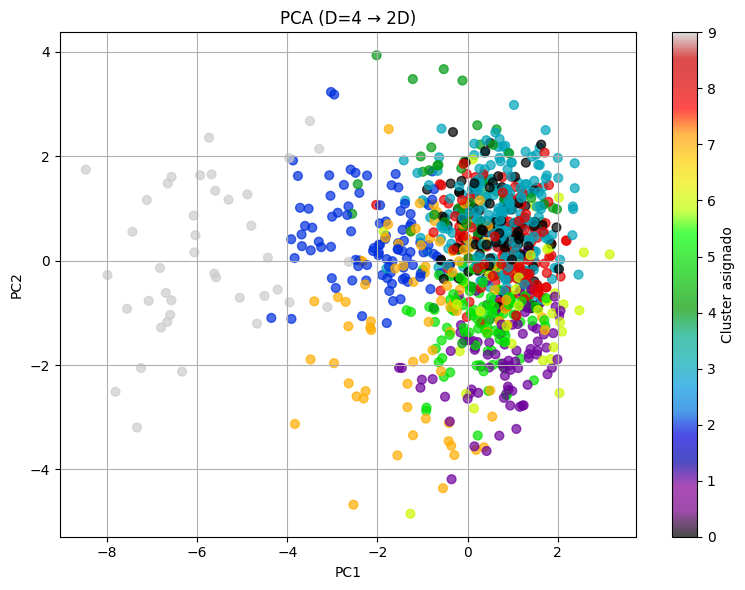

In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Si no lo has hecho aún: genera las etiquetas con KMeans (sobre X_scaled)
y = KMeans(n_clusters=10, random_state=42).fit_predict(X_scaled)

# Ya tienes: X_pca_4d = PCA(n_components=4).fit_transform(X_scaled)
# Ahora proyectamos esas 4D a 2D para graficar
X_pca_2d = PCA(n_components=2, random_state=42).fit_transform(X_pca_4d)
print("Projecting %d-dimensional data to 2D" % X_pca_4d.shape[1])

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y, cmap='nipy_spectral', s=40, alpha=0.7)
plt.title("PCA (D=4 → 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label="Cluster asignado")
plt.grid(True)
plt.tight_layout()
plt.show()

Projecting 4-dimensional data to 2D


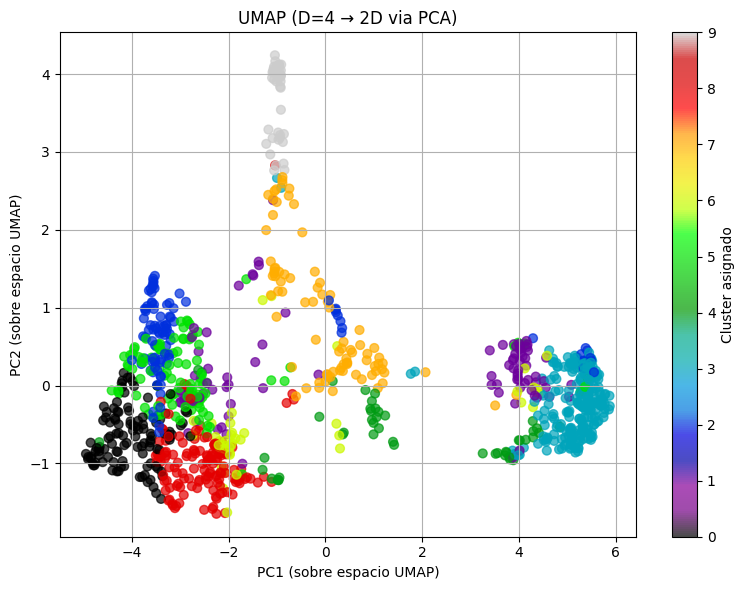

In [10]:
# Proyectar las 4D de UMAP a 2D con PCA
X_umap_2d = PCA(n_components=2, random_state=42).fit_transform(X_umap_4d)
print("Projecting %d-dimensional data to 2D" % X_umap_4d.shape[1])

plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, cmap='nipy_spectral', s=40, alpha=0.7)
plt.title("UMAP (D=4 → 2D via PCA)")
plt.xlabel("PC1 (sobre espacio UMAP)")
plt.ylabel("PC2 (sobre espacio UMAP)")
plt.colorbar(label="Cluster asignado")
plt.grid(True)
plt.tight_layout()
plt.show()


Projecting 13-dimensional data to 2D using t-SNE


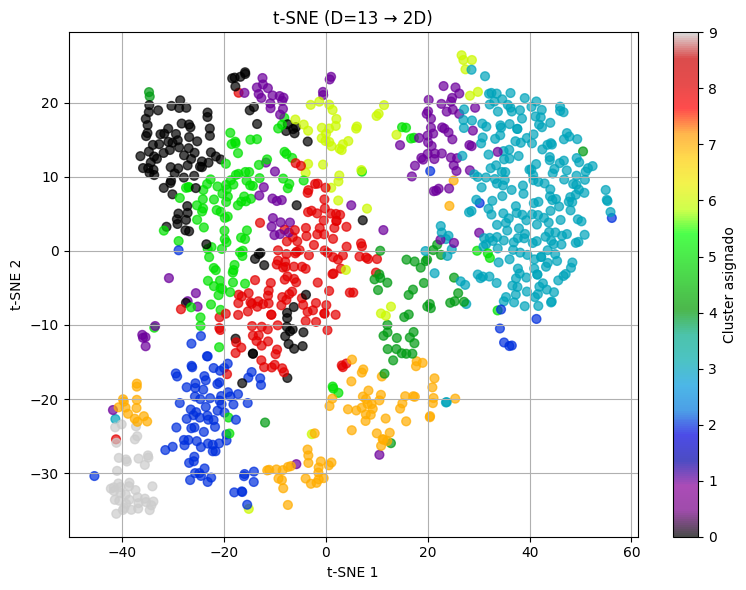

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Aplicar t-SNE a 2 dimensiones desde X_scaled (13 dimensiones)
print("Projecting %d-dimensional data to 2D using t-SNE" % X_scaled.shape[1])
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Graficar resultados
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='nipy_spectral', s=40, alpha=0.7)
plt.title("t-SNE (D=13 → 2D)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.colorbar(label="Cluster asignado")
plt.grid(True)
plt.tight_layout()
plt.show()



## **$\bullet$ Pregunta 2

¿Cuantas dimensiones son suficientes para representar mis datos?

En este item usted debe **justificar** bajo algún criterio la elección de la dimensión elegida para representar el conjunto de imágenes. Realice esto para ambos algoritmos seleccionados previamente y decida cual algortimo funciona mejor.

> **Observación: La elección de la dimension reducida y algoritmo sin justificación no obtendrán puntaje.**

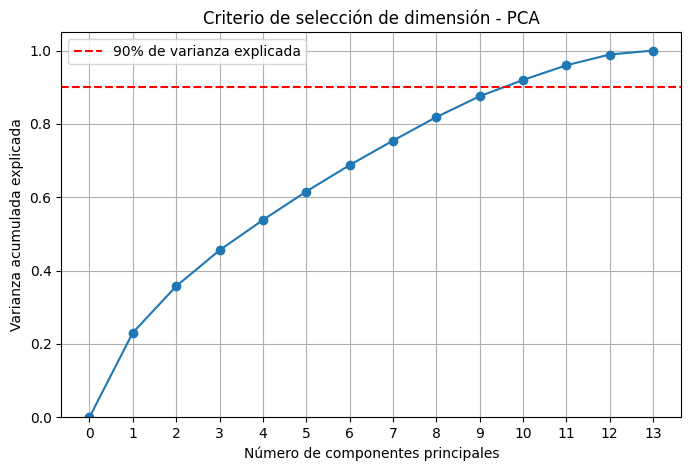

In [12]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Ajustar PCA con todas las dimensiones
pca_full = PCA().fit(X_scaled)

# Obtener varianza acumulada e insertar un 0 al inicio
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
cumulative_variance = np.insert(cumulative_variance, 0, 0)  # Partir en 0%

# Crear eje x: desde 0 hasta número de componentes
componentes = range(0, len(cumulative_variance))

# Gráfico
plt.figure(figsize=(8, 5))
plt.plot(componentes, cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--', label='90% de varianza explicada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada explicada')
plt.title('Criterio de selección de dimensión - PCA')
plt.xticks(componentes)
plt.ylim(0, 1.05)
plt.grid(True)
plt.legend()
plt.show()



In [13]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Probar UMAP a varias dimensiones
for d in [2, 4, 6, 8, 10]:
    X_umap = umap.UMAP(n_components=d, random_state=42).fit_transform(X_scaled)
    labels = KMeans(n_clusters=10, random_state=42).fit_predict(X_umap)
    score = silhouette_score(X_umap, labels)
    print(f"UMAP a D={d}: Silhouette Score = {score:.3f}")


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP a D=2: Silhouette Score = 0.438


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP a D=4: Silhouette Score = 0.388


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP a D=6: Silhouette Score = 0.374


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP a D=8: Silhouette Score = 0.373


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP a D=10: Silhouette Score = 0.384


Projecting 10-dimensional data to 2D


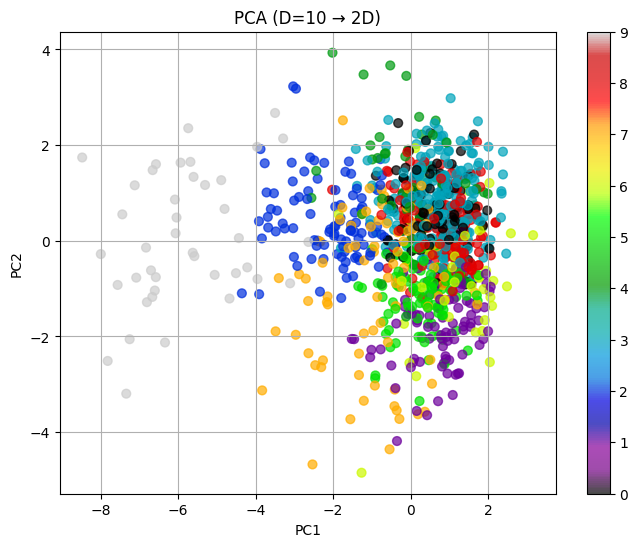

In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reducir a 10D con PCA
X_pca_10d = PCA(n_components=10, random_state=42).fit_transform(X_scaled)
print("Projecting %d-dimensional data to 2D" % X_pca_10d.shape[1])
# Proyectar esas 10D a 2D para visualización
X_pca_best = PCA(n_components=2, random_state=42).fit_transform(X_pca_10d)

# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_best[:, 0], X_pca_best[:, 1], c=y, cmap='nipy_spectral', s=40, alpha=0.7)
plt.title("PCA (D=10 → 2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.grid(True)
plt.show()


C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\jarpa\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Projecting 2-dimensional data to 2D


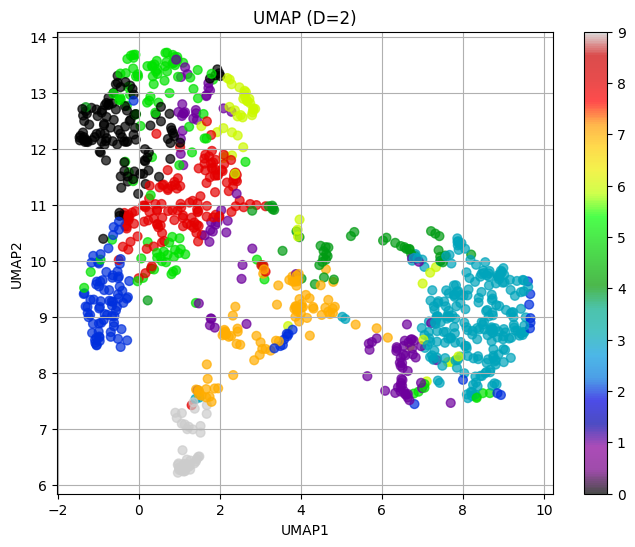

In [16]:
import umap.umap_ as umap

# Reducir directamente a 2D con UMAP
X_umap_best = umap.UMAP(n_components=2, n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_scaled)
print("Projecting %d-dimensional data to 2D" % X_umap_best.shape[1])
# Graficar
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_best[:, 0], X_umap_best[:, 1], c=y, cmap='nipy_spectral', s=40, alpha=0.7)
plt.title("UMAP (D=2)")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.colorbar()
plt.grid(True)
plt.show()


# **$\bullet$ Clustering (2.0 puntos)**
---
En este ítem usted debe utilizar el dataset con dimensionalidad reducida visto en la pregunta anterior y aplicar un algoritmo de clustering de su elección. Para obtener todo el puntaje usted debe realizar los siguientes puntos

*   Utilice alguna métrica para evaluar cuantos clusters definen correctamente su conjunto de datos (La métrica a utilizar depende del tipo de algortimo de clustering, pero las más tipicas son: *Inercia*, *Silhouette*, $BIC-AIC$, entre otros). Justifique cual es el mejor número de clusters que representan a los datos.
*   Compare diferentes variantes de su mismo algoritmo (esto puede ser a nivel de hiperparámetros, o distintas versiones de este mismo y vea cual funciona mejor comparando su métrica y tiempo total en computación.
*   Analice los resultados en función de cómo se organizaron los cluster, ¿qué relación tienen los datos? Ej: en el cluster 1 se agrupan los datos con características XXXXXXXX; en el cluster 2 se observan los datos YYYYYY, etc.



In [77]:
X_reduced = X_pca_10d  


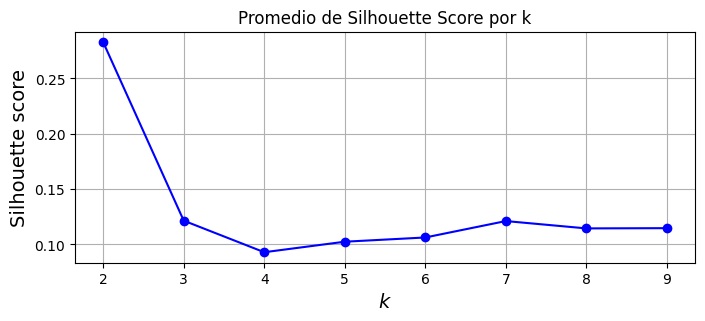

Silhouette Scores:
k = 2: Silhouette Score = 0.2827
k = 3: Silhouette Score = 0.1215
k = 4: Silhouette Score = 0.0930
k = 5: Silhouette Score = 0.1025
k = 6: Silhouette Score = 0.1063
k = 7: Silhouette Score = 0.1211
k = 8: Silhouette Score = 0.1145
k = 9: Silhouette Score = 0.1147


In [100]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib.pyplot as plt
import numpy as np

# Usar tus datos reducidos
X_train = X_pca_10d  # o X_umap_best

# Entrenar modelos para k = 1 a 9
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_train) for k in range(1, 10)]

# Calcular inercia y Silhouette Score (a partir de k=2)
inertias = [model.inertia_ for model in kmeans_per_k]
silhouette_scores = [silhouette_score(X_train, model.labels_) for model in kmeans_per_k[1:]]

# Silhouette Score promedio
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.title("Promedio de Silhouette Score por k")
plt.grid(True)
plt.show()

# Imprimir resultados
print("Silhouette Scores:")
for k, score in zip(range(2, 10), silhouette_scores):
    print(f"k = {k}: Silhouette Score = {score:.4f}")



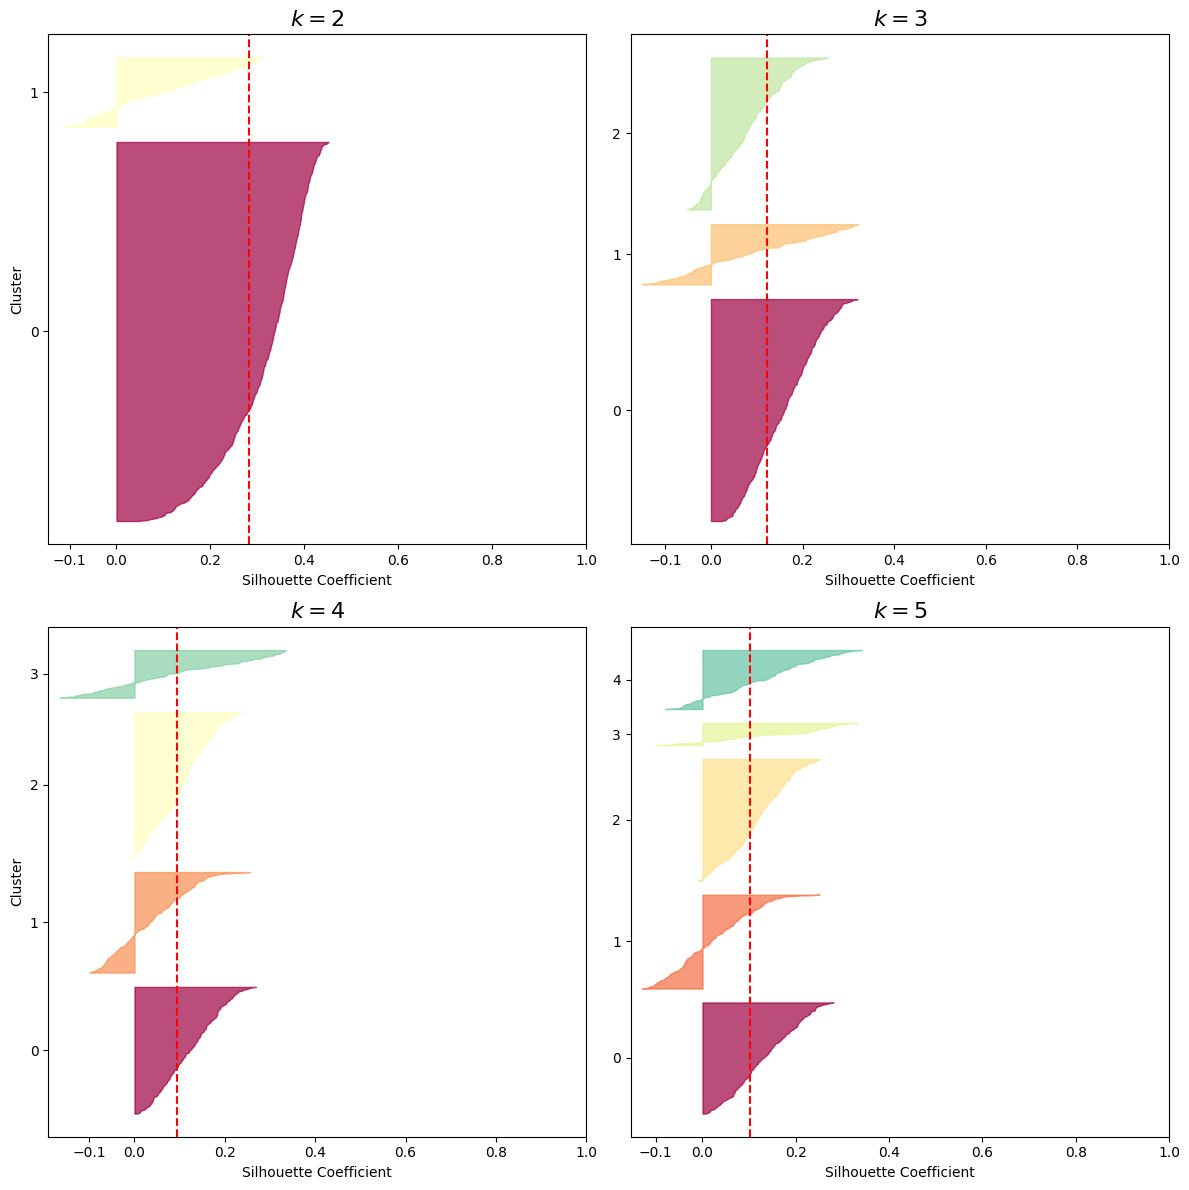

In [101]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X_for_clustering = X_pca_10d  # o X_umap_best si prefieres comparar

kmeans_per_k = {}
silhouette_scores = []

# Probar varios valores de k
for k in (2, 3, 4, 5):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_for_clustering)
    kmeans_per_k[k] = kmeans
    silhouette_avg = np.mean(silhouette_samples(X_for_clustering, kmeans.labels_))
    silhouette_scores.append(silhouette_avg)

# Graficar siluetas
plt.figure(figsize=(12, 12))

for i, k in enumerate((2, 3, 4, 5)):
    plt.subplot(2, 2, i + 1)
    y_pred = kmeans_per_k[k].labels_
    silhouette_vals = silhouette_samples(X_for_clustering, y_pred)

    padding = len(X_for_clustering) // 30
    pos = padding
    ticks = []

    for cluster in range(k):
        coeffs = silhouette_vals[y_pred == cluster]
        coeffs.sort()
        color = plt.cm.Spectral(float(cluster) / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    
    plt.xlabel("Silhouette Coefficient")  # 🔧 Mostrar siempre el eje X
    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    if i % 2 == 0:
        plt.ylabel("Cluster")

    plt.axvline(x=silhouette_scores[i], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=16)

plt.tight_layout()
plt.show()


     Configuración  Silhouette Score  Tiempo (s)
0        n_init=10          0.282328    0.161237
1       n_init=100          0.282328    1.199662
2  algorithm=elkan          0.282328    0.102867
3          default          0.282328    0.134310


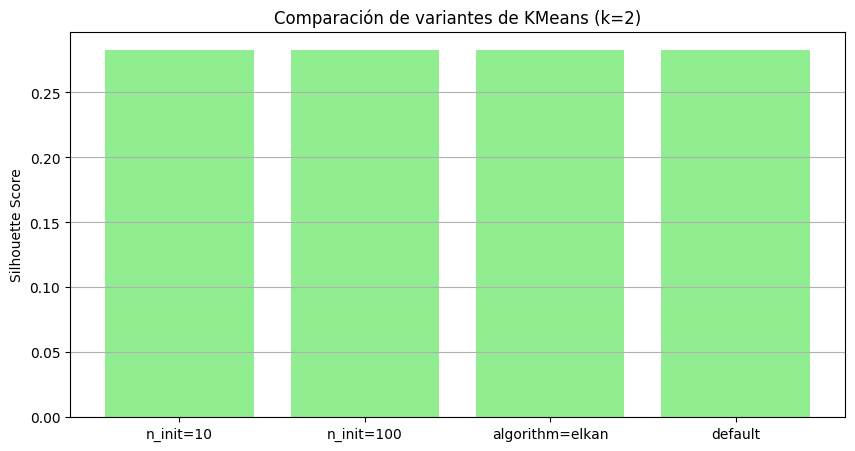

In [109]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

X_train = X_pca_10d  # o X_umap_best

# Lista de configuraciones a probar
configuraciones = [
    {"name": "n_init=10", "params": {"n_init": 10, "algorithm": "lloyd"}},
    {"name": "n_init=100", "params": {"n_init": 100, "algorithm": "lloyd"}},
    {"name": "algorithm=elkan", "params": {"n_init": 10, "algorithm": "elkan"}},
    {"name": "default", "params": {"n_init": 10, "algorithm": "lloyd"}},
]

resultados = []

for config in configuraciones:
    start_time = time.time()
    model = KMeans(n_clusters=2, random_state=42, **config["params"])
    labels = model.fit_predict(X_train)
    score = silhouette_score(X_train, labels)
    elapsed_time = time.time() - start_time

    resultados.append({
        "Configuración": config["name"],
        "Silhouette Score": score,
        "Tiempo (s)": elapsed_time
    })

# Convertir a DataFrame y mostrar
df_comparacion = pd.DataFrame(resultados)
print(df_comparacion)

# Gráfico de comparación de Silhouette Scores
plt.figure(figsize=(10, 5))
plt.bar(df_comparacion["Configuración"], df_comparacion["Silhouette Score"], color="lightgreen")
plt.title("Comparación de variantes de KMeans (k=2)")
plt.ylabel("Silhouette Score")
plt.grid(True, axis='y')
plt.show()


In [105]:
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=2, random_state=42)
labels_final = kmeans_final.fit_predict(X_pca_10d)

df["cluster"] = labels_final  # o df_numeric["cluster"]
df.groupby("cluster")[numeric_columns].mean()


,duration_ms,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,,,
0,211075.802367,61.700592,0.637375,0.719925,5.207101,-5.887207,0.597633,0.098172,0.186334,0.024683,0.198958,0.550250,123.173304
1,219416.554839,47.045161,0.469987,0.336937,5.438710,-14.101181,0.696774,0.054494,0.699277,0.347373,0.133489,0.333418,116.529071
